GBM
- GBM은 가중치를 업데이트할 떄 경사 하강법을 이용하는 것이 큰 차이

---

HAR 실습

In [1]:
import pandas as pd

url ='https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/features.txt'

feature_name_df = pd.read_csv(url, sep='\s+',header=None, names=['column_index', 'column_name'])
feature_name = feature_name_df.iloc[:,1].values.tolist()

X_train_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/train/X_train.txt'
X_test_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/test/X_test.txt'

X_train = pd.read_csv(X_train_url,sep='\s+', header=None)
X_test = pd.read_csv(X_test_url,sep='\s+', header=None)

X_train.columns = feature_name
X_test.columns = feature_name

In [7]:
y_train_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/train/y_train.txt'
y_test_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/test/y_test.txt'

y_train = pd.read_csv(y_train_url,sep='\s+', header=None, names=['action'])
y_test = pd.read_csv(y_test_url,sep='\s+', header=None, names=['action'])

In [16]:
y_train['action'].value_counts()

action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64

In [4]:
X_train.shape, X_test.shape

((7352, 561), (2947, 561))

In [6]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import time
import warnings

warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import train_test_split

X_test,

In [8]:
start_time = time.time()
gb_clf = GradientBoostingClassifier(random_state=13)
gb_clf.fit(X_train,y_train)
gb_pred = gb_clf.predict(X_test)

print('ACC:',accuracy_score(y_test,gb_pred))
print('Fit time:',time.time() - start_time())

#시간이 오래걸림

KeyboardInterrupt: 

In [ ]:
print('ACC:',accuracy_score(y_test,gb_pred))
print('Fit time:',time.time() - start_time)

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_setimators' : [100,500],
    'learning_rate' : [0.05,0.1]
}

start_time = time.time()

grid = GridSearchCV(gb_clf,param_grid=params, verbose=1,cv=2, n_jobs=-1)
grid.fit(X_train,y_train)

print('FIt time:',time.time() - start_time)

---

# XGBoost
- GBM 기반의 알고리즘인데, GBM의 느린 속도를 다양한 규제를 통해 해결
- 특히 병렬학습이 가능하도록 설계됨

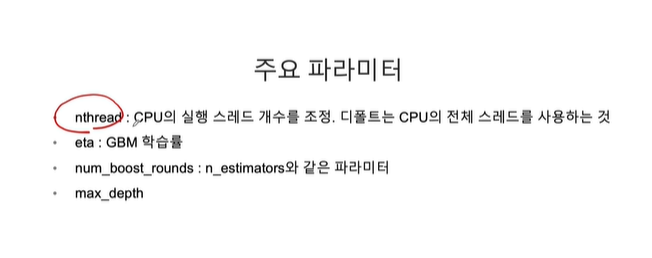

In [21]:
#XGBoost 오류: target 데이터 values들이 0부터 시작하도록 encoding을 해야 돌아간다
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_train = le.fit_transform(y_train)

In [23]:
from xgboost import XGBClassifier

start_time = time.time()
xgb = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb.fit(X_train.values, y_train) #xgboost는 np.array형식으로 넣어줘야 한다

print('Fit time:',time.time() - start_time)

#지금 target 데이터 values들이 0부터 시작하도록 encoding을 해야 돌아갈듯

Fit time: 59.144033432006836


In [26]:
#accuracy 확인할 때는 다시 inverser_transform 해서 확인해야함

pred = xgb.predict(X_test.values)
pred = le.inverse_transform(pred)
accuracy_score(y_test,pred)

0.9497794367153037

우선 GBM과 XGBoost는 이 데이터에서는 성능이 비슷한 수치로 나왔다. 
하지만 XGBoost가 더 빠르다.

**조기 종료 조건과 검증데이터를 지정할 수 있다**

- early_stopping_rounds : 최적화된 성능이 지정한 횟수만큼 나오면 종료해라
- eval_set : validation 데이터 직접지정

In [28]:
le = LabelEncoder()

y_test= le.fit_transform(y_test)
evals = [(X_test.values,y_test)]

start_time = time.time()
xgb = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb.fit(X_train.values, y_train, early_stopping_rounds=10, eval_set=evals) 
#early_stopping_rounds : 최적화된 성능이 지정한 횟수만큼 나오면 종료해라
#eval_set : validation 데이터 직접지정

print('Fit time:',time.time() - start_time)

[0]	validation_0-mlogloss:1.58912
[1]	validation_0-mlogloss:1.43298
[2]	validation_0-mlogloss:1.30579
[3]	validation_0-mlogloss:1.19398
[4]	validation_0-mlogloss:1.10151
[5]	validation_0-mlogloss:1.01952
[6]	validation_0-mlogloss:0.94821
[7]	validation_0-mlogloss:0.88468
[8]	validation_0-mlogloss:0.82846
[9]	validation_0-mlogloss:0.77660
[10]	validation_0-mlogloss:0.73051
[11]	validation_0-mlogloss:0.68873
[12]	validation_0-mlogloss:0.65163
[13]	validation_0-mlogloss:0.61809
[14]	validation_0-mlogloss:0.58776
[15]	validation_0-mlogloss:0.55936
[16]	validation_0-mlogloss:0.53447
[17]	validation_0-mlogloss:0.51131
[18]	validation_0-mlogloss:0.49076
[19]	validation_0-mlogloss:0.47043
[20]	validation_0-mlogloss:0.45119
[21]	validation_0-mlogloss:0.43441
[22]	validation_0-mlogloss:0.41777
[23]	validation_0-mlogloss:0.40352
[24]	validation_0-mlogloss:0.38949
[25]	validation_0-mlogloss:0.37684
[26]	validation_0-mlogloss:0.36371
[27]	validation_0-mlogloss:0.35286
[28]	validation_0-mlogloss:0.3

In [31]:
pred = xgb.predict(X_test.values)
pred = le.inverse_transform(pred)
y_test= le.inverse_transform(y_test)

accuracy_score(y_test,pred)

0.9453681710213777

---

# LightGBM

- 데이터의 수가 충분히 많다면 가장 빠르게 동작함
- 단점은 데이터 수가 적으면 성능이 현저히 낮아짐

In [32]:
!pip install lightgbm

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.4 MB 991.0 kB/s eta 0:00:02
   ----------- ---------------------------- 0.4/1.4 MB 5.0 MB/s eta 0:00:01
   ------------------------ --------------- 0.9/1.4 MB 7.0 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.4 MB 8.2 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 7.7 MB/s eta 0:00:00


In [34]:
from lightgbm import LGBMClassifier

le = LabelEncoder()

y_train= le.fit_transform(y_train)
y_test= le.fit_transform(y_test)

evals = [(X_test.values,y_test)]

start_time = time.time()
lgbm = LGBMClassifier(n_estimators=400)
lgbm.fit(X_train.values ,y_train, eval_set=evals)

print('Fit time:',time.time() - start_time)

Fit time: 30.751689910888672


In [35]:
pred = lgbm.predict(X_test.values)
pred = le.inverse_transform(pred)
y_test= le.inverse_transform(y_test)

accuracy_score(y_test,pred)

0.9375636240244316